In [40]:
import numpy as np
import sys
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats
from scipy import interpolate

sys.path.insert(1, '/media/chris/Files/EuclidAGN/')
from AGNCatalogToolbox import main as AGN

In [3]:
data_path = "/media/chris/Files/Astronomy/MultiDark/npy_files/MD_0.987.npy"

data = np.load(data_path)

In [5]:
sm = AGN.halo_mass_to_stellar_mass(np.log10(data['mvir']), 0.0)

Scatter is a thing, valued at 0.11


In [12]:
def sizes_ric_nat(sm):
    return (10**-0.314) * ((10*sm)*0.042) * (1 + (10**sm)/(10**10.537))**0.76

def sizes_FS(sm):
    return 0.1 * ((10**sm)**0.14) * ((1 + (10**sm)/(3.98e10))) ** (0.39-0.14)


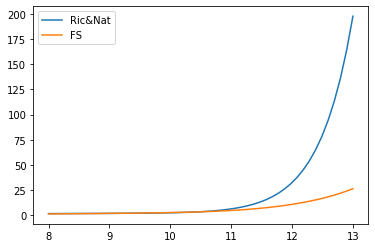

In [19]:
plt.figure()
sm_range = np.linspace(8, 13)
plt.plot(sm_range, sizes_ric_nat(sm_range), label = "Ric&Nat")
plt.plot(sm_range, sizes_FS(sm_range), label = "FS")
plt.legend()
plt.show()


In [37]:
df = pd.read_csv("/media/chris/Files/Astronomy/SDSS/Catalog_SDSS_complete.dat", sep = ' ')
df

,galcount,zMeert,Vmaxwt,NewLCentSat,MsMendSerExp,MsCent,AbsMag,logReSerExp,logReSerExpNotTrunc,logReSerExpCircNotTrunc,logR80NotTrunc,BT,n_bulge,ba_tot,TType,P_S0,P_bar_GZ2,P_bar_Nair10,finalflag
0,149548,0.054011,1.613911e-09,1,10.599,10.599,-21.190297,0.659038,0.717747,0.548802,1.317827,0.545557,4.1700,0.685122,-2.299939,0.109288,0.023891,0.050592,3
1,563583,0.128931,9.118888e-10,1,10.930,10.930,-21.662988,0.582902,0.641673,0.533483,1.287125,0.628378,4.1364,0.736998,-2.232040,0.436752,0.002571,0.171754,3
2,563585,0.139541,6.096260e-10,1,11.060,11.060,-22.003472,0.924811,0.957398,0.808674,1.449793,0.665422,3.3855,0.725503,-1.758271,0.638294,0.019296,0.344708,3
3,563587,0.139342,6.627763e-10,1,10.919,10.919,-21.932261,0.753697,0.760248,0.684905,1.106753,0.000000,1.9277,0.721403,-0.200291,0.966580,0.002689,0.298696,5
4,563588,0.127600,8.551593e-10,1,10.723,10.723,-21.716880,-999.000000,0.803957,0.803957,0.803957,0.194163,1.0000,0.539092,-0.120347,0.976037,0.164741,0.399863,3
5,563592,0.139034,5.934180e-10,0,11.063,11.374,-22.026489,0.852454,0.952098,0.873539,1.574676,0.745780,5.8028,0.846183,-2.292539,0.128411,0.007504,0.125728,3
6,563593,0.139019,4.536806e-10,1,11.374,11.374,-22.808317,0.855484,0.901628,0.879224,1.379038,1.000000,3.6435,0.897197,-2.375154,0.169763,0.010819,0.094674,1
7,563594,0.020488,2.179459e-07,0,8.576,9.378,-17.461317,0.284455,0.284455,0.180212,0.515924,0.000000,0.8401,0.618961,4.113081,0.980826,0.168220,0.394463,5
8,563589,0.020559,1.798490e-08,1,9.378,9.378,-19.286484,0.147623,0.167579,0.084909,0.571979,1.000000,2.6242,0.691839,-1.928284,0.905516,0.004228,0.180299,1
9,563595,0.068915,3.393334e-09,1,10.370,10.370,-20.589704,0.497483,0.498786,0.382176,0.788387,0.000000,1.3424,0.580149,-0.629708,0.989956,0.000257,0.353768,5


In [41]:
 # Grab useful fields
SersicIndex = np.array(df['n_bulge'])
StellarMass = np.array(df['MsCent'])
VMax = np.array(df["Vmaxwt"])

# Create flags to remove offending galaxies
flag_central = df["NewLCentSat"] == 1. # Only centrals
flag_hasMass = StellarMass != -999. # Only valid stellar masses
flag_is8 = SersicIndex != 8. # Cap
flag_is0 = SersicIndex != 0.1
flag_morph = np.array(df["TType"]) < 0.
flag_combined = flag_hasMass & flag_is8 & flag_is0 & flag_central & flag_morph

# Remove galaxies
StellarMass = StellarMass[flag_combined]
SersicIndex = SersicIndex[flag_combined]
VMax = VMax[flag_combined]

# Bin up the SDSS
bins = np.arange(3.0, 15.0, 0.05)
# Weighted average by VMax
array, edges, numbers = stats.binned_statistic(StellarMass, VMax*SersicIndex, statistic = 'sum', bins = bins)
den = stats.binned_statistic(StellarMass, VMax, statistic = 'sum', bins = bins)[0]
array = array/den # Calculate the numerator and denominator separately, to make the best use of binned statistic

# For the purposes of the error, we need to do some housekeeping here
means = np.zeros(len(numbers)) # Storage array for the means - the value of the mean at each element
for i in range(len(means)):
    means[i] = array[numbers[i]-1] # There probably is a faster way to do this
# Calculate the components needed for the standard deviation
std_wrong = stats.binned_statistic(StellarMass, VMax*(SersicIndex - means)**2, statistic = 'sum', bins = bins)[0]
binCounts = stats.binned_statistic(StellarMass, means, statistic = 'count', bins = bins)[0]
# Calculate the standard deviation
dev = np.sqrt(std_wrong/(((binCounts-1)/binCounts)*den))

get_SersicIndex = interpolate.interp1d(bins[0:-1], array)
get_Error = interpolate.interp1d(bins[0:-1], dev)


/home/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/home/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in true_divide
/home/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in multiply
/home/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


In [47]:
sm_range = np.linspace(9, 12)
n_test = get_SersicIndex(sm_range)
n_error = get_Error(sm_range)

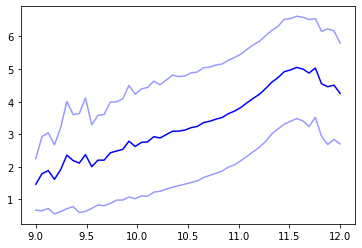

In [51]:
plt.figure()
plt.plot(sm_range, n_test, color = 'b')
plt.plot(sm_range, n_test + n_error, color = 'b', alpha = 0.4)
plt.plot(sm_range, n_test - n_error, color = 'b', alpha = 0.4)
plt.show()